# **Email Campaign A/B Testing**

 **Goal:** Compare conversion rates between the old landing page (control) and the new landing page (treatment). 

**Tools:** Python (pandas, numpy), statsmodels, matplotlib.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Loading dataset
df = pd.read_csv("ab_data.csv")

## 1) Data Cleaning

In [17]:
# - Keeping only proper group/page pairs  
# - Removing duplicate users


df_clean = df[((df['group']=='control') & (df['landing_page']=='old_page')) |
              ((df['group']=='treatment') & (df['landing_page']=='new_page'))].copy()
df_clean = df_clean.drop_duplicates(subset='user_id')
print("Cleaned data shape:", df_clean.shape)


Cleaned data shape: (290584, 5)


## 2) Sanity Check

In [16]:
# Checking group sizes & conversion value

print("Control group:", df_clean[df_clean['group']=='control'].shape[0])
print("Treatment group:", df_clean[df_clean['group']=='treatment'].shape[0])
print("Unique converted values:", df_clean['converted'].unique())

Control group: 145274
Treatment group: 145310
Unique converted values: [0 1]


## 3) Conversion Rates

In [33]:
conversion_A = df_clean[df_clean['group']=='control']['converted'].mean()
conversion_B = df_clean[df_clean['group']=='treatment']['converted'].mean()
print(f"Conversion A: {conversion_A*100:.2f}%")
print(f"Conversion B: {conversion_B*100:.2f}%")

Conversion A: 12.04%
Conversion B: 11.88%


## 4) Z-Test for Statistical Significance

In [8]:
success = [df_clean[df_clean['group']=='control']['converted'].sum(),
           df_clean[df_clean['group']=='treatment']['converted'].sum()]
nobs = [df_clean[df_clean['group']=='control'].shape[0],
        df_clean[df_clean['group']=='treatment'].shape[0]]

z_stat, p_value = proportions_ztest(success, nobs)
print("Z-statistic:", z_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Result: Statistically significant difference")
else:
    print("Result: No statistically significant difference")


Z-statistic: 1.3109241984234394
P-value: 0.18988337448195103
Result: No statistically significant difference


## 5) Confidence Intervals

95% CI Control: (0.11872297704421185, 0.1220697075630713)
95% CI Treatment: (0.11715449706961521, 0.12048178803682728)


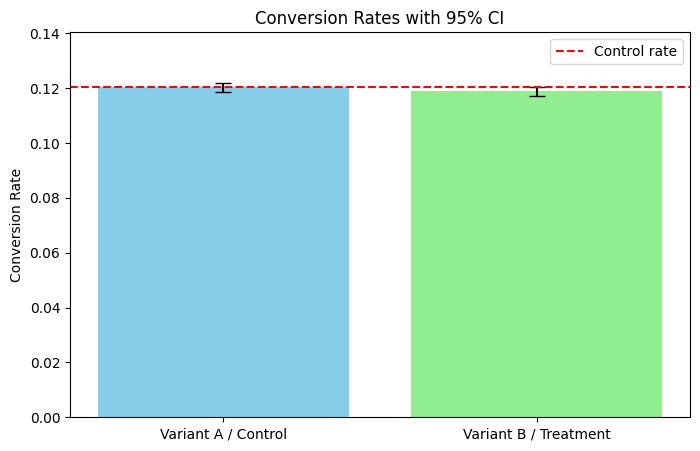

In [32]:
ci_A = proportion_confint(success[0], nobs[0], alpha=0.05, method='wilson')
ci_B = proportion_confint(success[1], nobs[1], alpha=0.05, method='wilson')
print(f"95% CI Control: {ci_A}")
print(f"95% CI Treatment: {ci_B}")

# Plot with error bars
labels = ['Variant A / Control', 'Variant B / Treatment']
rates = [conversion_A, conversion_B]
ci_upper = [ci_A[1]-conversion_A, ci_B[1]-conversion_B]  

plt.figure(figsize=(8,5))
bars = plt.bar(labels, rates, yerr=ci_upper, capsize=6, color=['skyblue','lightgreen'])

plt.axhline(conversion_A, color='red', linestyle='--', label='Control rate')

plt.ylabel("Conversion Rate")
plt.title("Conversion Rates with 95% CI")
plt.legend()
plt.ylim(0, max(rates)+0.02) 

plt.show()

## 6) Difference in Conversion Rates

In [18]:
diff = conversion_B - conversion_A
print(f"Absolute difference (B - A): {diff*100:.3f} percentage points")

Absolute difference (B - A): -0.158 percentage points


## 7) Daily / Time Trend Analysis

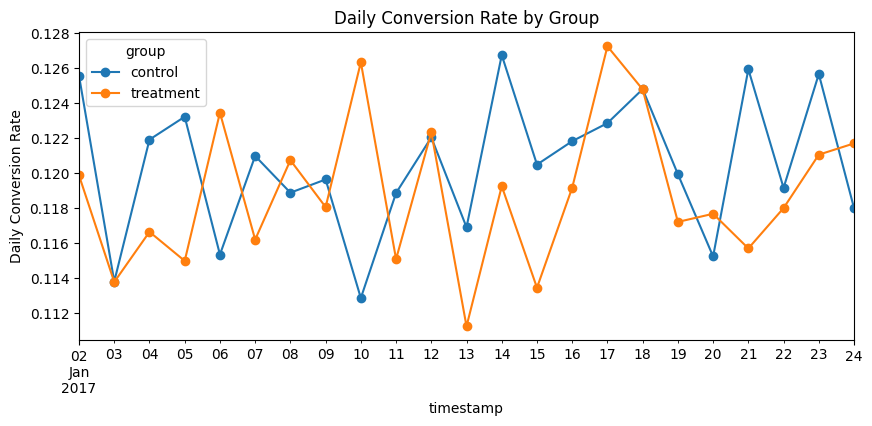

In [27]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
daily = df_clean.set_index('timestamp').groupby([pd.Grouper(freq='D'),'group'])['converted'].mean().unstack()
daily.plot(figsize=(10,4), marker='o', title='Daily Conversion Rate by Group')
plt.ylabel('Daily Conversion Rate')
plt.show()

## 8) Conclusion

#### 1. Sample Overview:
- **Control group (old landing page) =** 145,274 users  
- **Treatment group (new landing page) =** 145,310 users  
- Conversion values = 0 (no conversion) or 1 (converted)  

#### 2. Conversion Rates:
- **Control (Variant A):** 12.04%  
- **Treatment (Variant B):** 11.88%  
- **Absolute difference (B − A) = −0.158 percentage points**, indicating that the new landing page performed slightly worse than the old one.  

#### 3. Statistical Significance (Z-Test):
- **Z-statistic =** 1.31  
- **P-value =** 0.1899 (> 0.05)  
- **Interpretation:** Since p > 0.05, we **fail to reject the null hypothesis**, meaning there is **no statistically significant difference** in conversion rates between the old and new landing pages.  

#### 4. Confidence Intervals: 
- **Control:** 11.87% – 12.21%  
- **Treatment:** 11.72% – 12.05%  
- The overlap of these intervals further confirms that the observed difference could be due to random variation.  

#### 5. Recommendation:
- The current data does **not provide sufficient evidence** that the new landing page improves conversion rates.  
- Before rolling out the new page, it is advisable to:  
   - Increase the sample size to improve statistical power.  
   - Test additional variants or design changes.  
   - Consider segmenting users (e.g., by device, geography, or traffic source) to identify if the new page performs better for specific groups.  

**Overall:** The experiment suggests that the new landing page does **not provide a measurable improvement** over the existing page. The marketing team should continue testing with larger samples or explore other design optimizations to meaningfully impact conversions.
